In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv(r'C:\Users\Rameshwar Agarwal\Desktop\python\assignment 11\BX-Book-Ratings.csv', encoding=('ISO-8859-1'))
df

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048575 non-null  int64 
 1   isbn     1048575 non-null  object
 2   rating   1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
df.groupby('isbn')['rating'].mean().sort_values(ascending = False).head()

isbn
689851022     10.0
1884718051    10.0
8481304352    10.0
385073496     10.0
345462831     10.0
Name: rating, dtype: float64

In [8]:
df.groupby('isbn')['rating'].count().sort_values(ascending = False).head()

isbn
971880107    2264
316666343    1164
385504209     813
312195516     668
60928336      662
Name: rating, dtype: int64

In [9]:
ratings = pd.DataFrame(df.groupby('isbn')['rating'].mean())
ratings.head()

,rating
isbn,
904492401X,0.0
#069580216X,0.0
#6612432,5.0
(THEWINDMILLP,0.0
)416195113,8.0


In [10]:
ratings['No. of ratings']= pd.DataFrame(df.groupby('isbn')['rating'].count())

In [11]:
ratings

,rating,No. of ratings
isbn,,
904492401X,0.0,1
#069580216X,0.0,1
#6612432,5.0,1
(THEWINDMILLP,0.0,1
)416195113,8.0,1
...,...,...
`3502103682,0.0,2
b00005wz75,0.0,1
cn108465,0.0,1


<Axes: >

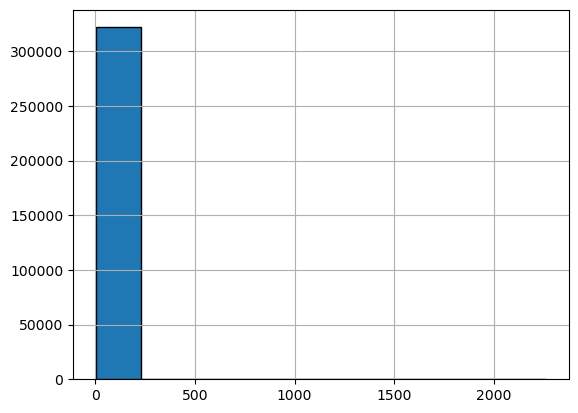

In [20]:
ratings['No. of ratings'].hist(ec='black')

<Axes: >

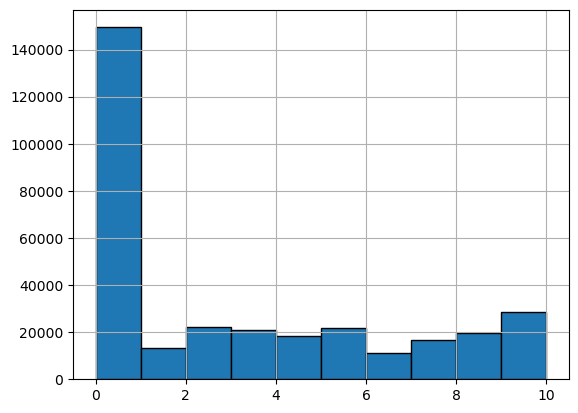

In [18]:
ratings['rating'].hist(ec='black')

In [ ]:
sns.jointplot(x='rating', y='No. of ratings', data=ratings)

In [ ]:
book_pivot = df.pivot_table(index='user_id', columns='isbn', values='rating')

In [24]:
ratings.sort_values(['No. of ratings'], ascending=False).head(10)

,rating,No. of ratings
isbn,,
971880107,1.032244,2264
316666343,4.457045,1164
385504209,4.691267,813
312195516,4.326347,668
60928336,3.462236,662
044023722X,3.166387,595
679781587,4.378893,578
142001740,4.331532,555
067976402X,3.278986,552


In [ ]:
max_rating = book_pivot['971880107']

In [ ]:
similar_max_rating = book_pivot.corrwith['max_rating']

In [ ]:
corr_max_rating = pd.DataFrame(similar_max_rating,columns=['Correlation'])
corr_max_rating.dropna(inplace=True)
corr_max_rating.head()

In [ ]:
corr_max_rating.sort_values('Correlation',ascending=False).head(10)

In [ ]:
corr_max_rating = corr_max_rating.join(ratings['num of ratings'])
corr_max_rating.head()

In [ ]:
corr_max_rating[corr_max_rating['num of ratings']>100].sort_values('Correlation',ascending=False).head()